<a href="https://colab.research.google.com/github/luvgadhvi/parcel-analysis/blob/main/Final_Project_Group_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
parcel_data = pd.read_csv('COVID_Parcel_Business.csv')

In [6]:
print("Dataset Overview:")
parcel_data

Dataset Overview:


,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME
0,718117,2021,1,8
1,718117,2020,7,257
2,718117,2019,39,141
3,718117,2018,1,14
4,718117,2021,2,192
...,...,...,...,...
190714,228893,2019,13,30
190715,228893,2019,38,122
190716,228893,2019,48,99
190717,228893,2019,20,61


In [7]:
yearly_pivot = pd.pivot_table(parcel_data, values='VOLUME', index='THE_YEAR', aggfunc='sum')

In [8]:
print("Yearly Parcel Volume (Pivot Table):")
print(yearly_pivot)

Yearly Parcel Volume (Pivot Table):
            VOLUME
THE_YEAR          
2018      49099478
2019      52823114
2020      73475690
2021      48679668


<Figure size 1000x600 with 0 Axes>

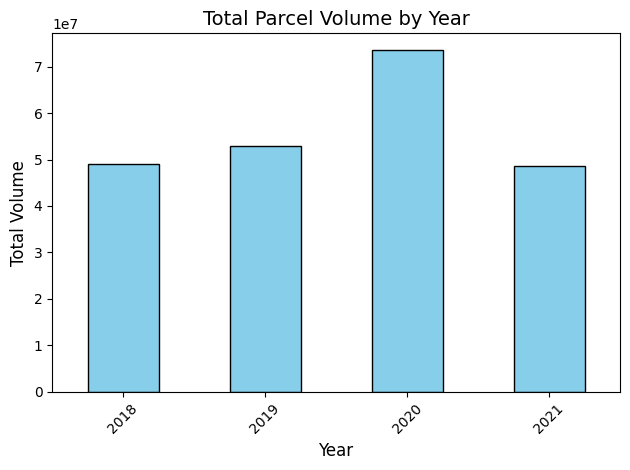

In [9]:
# A bar chart is used to visualize the total volume of parcels shipped each year.
plt.figure(figsize=(10, 6))
yearly_pivot.plot(kind='bar', legend=False, color='skyblue', edgecolor='black')
plt.title('Total Parcel Volume by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Volume', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
weekly_pivot = pd.pivot_table(parcel_data, values='VOLUME', index='THE_WEEK', columns='THE_YEAR', aggfunc='sum')

In [11]:
print("Weekly Parcel Volume Trends (Pivot Table):")
print(weekly_pivot.head())

Weekly Parcel Volume Trends (Pivot Table):
THE_YEAR      2018       2019       2020       2021
THE_WEEK                                           
1         817751.0   814361.0   554951.0   134137.0
2         925839.0  1048800.0  1078417.0  1583754.0
3         854760.0  1073634.0  1008084.0  1322546.0
4         800040.0   937502.0   934713.0  1310292.0
5         812249.0   870849.0   938521.0  1270718.0


<Figure size 1400x800 with 0 Axes>

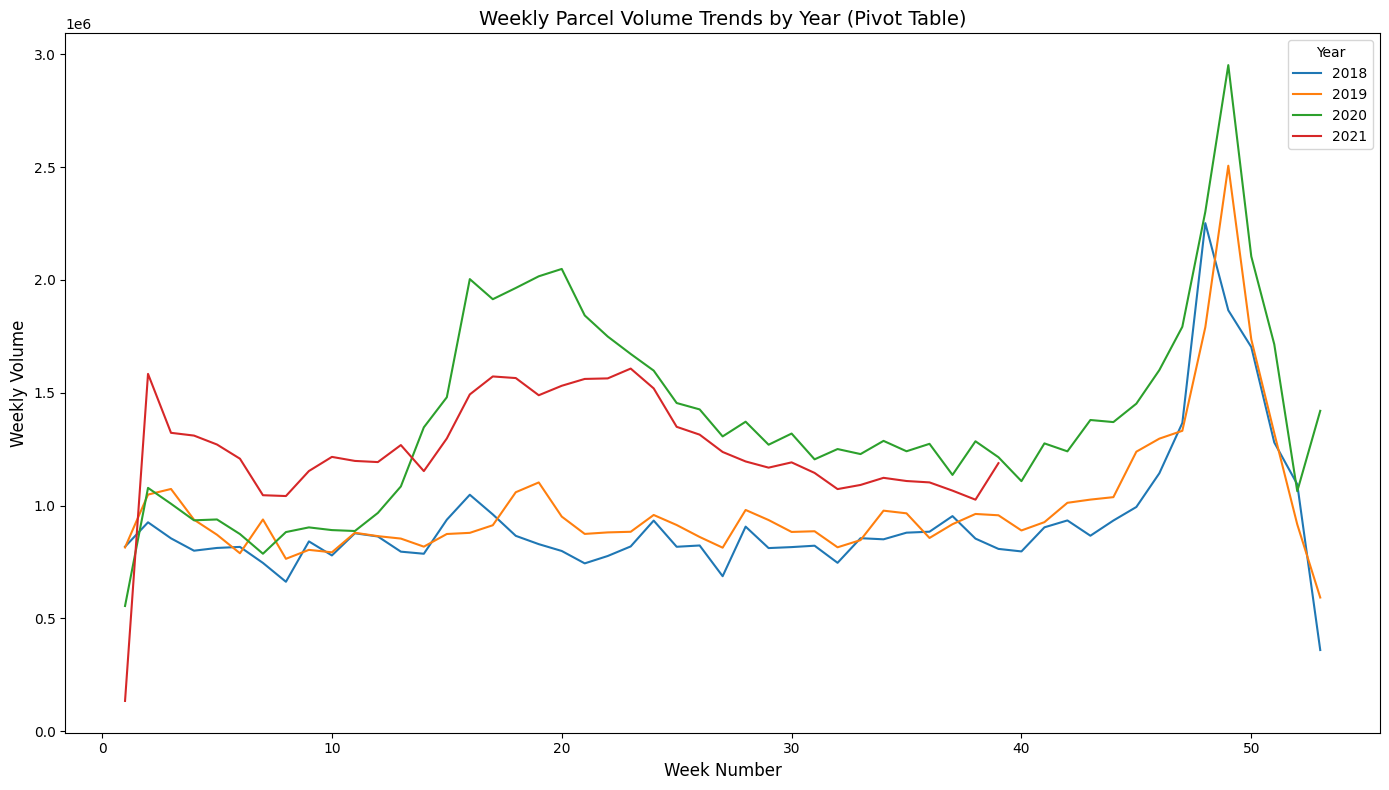

In [12]:
plt.figure(figsize=(14, 8))
weekly_pivot.plot(kind='line', figsize=(14, 8))
plt.title('Weekly Parcel Volume Trends by Year (Pivot Table)', fontsize=14)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Weekly Volume', fontsize=12)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

Customer Distribution by Year:
THE_YEAR
2018    1025
2019    1061
2020    1046
2021    1014
Name: FakeCustomerID, dtype: int64


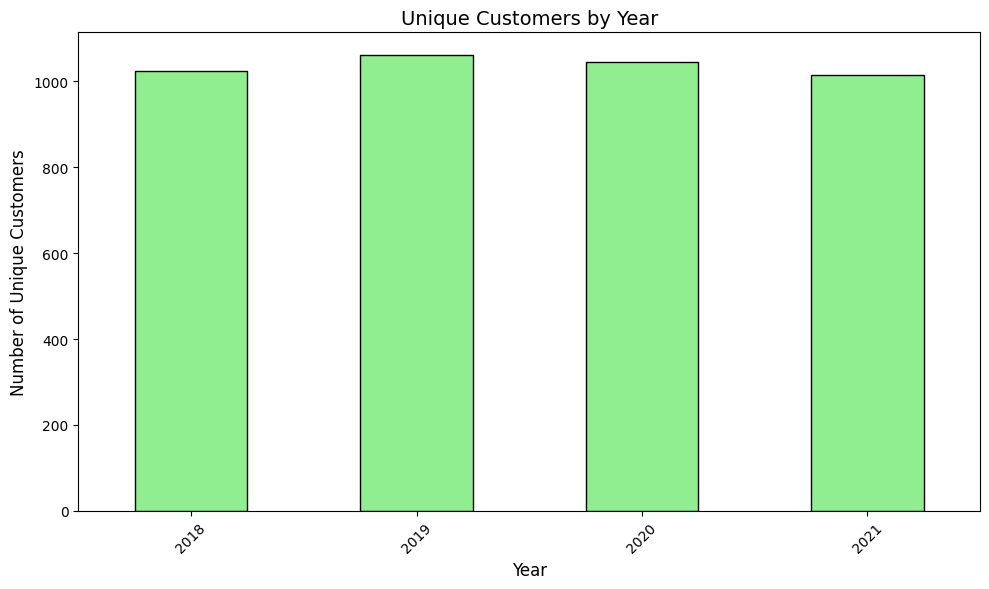

In [13]:
customer_distribution = parcel_data.groupby('THE_YEAR')['FakeCustomerID'].nunique()

# Display the number of unique customers per year.
print("Customer Distribution by Year:")
print(customer_distribution)

# Visualize Customer Distribution
# A bar chart is used to show the number of unique customers each year.
plt.figure(figsize=(10, 6))
customer_distribution.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Unique Customers by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unique Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Pre-COVID 2019 Volume: 13122816
Pre-COVID 2020 Volume: 14619017
COVID Period 2020 Volume: 58856673


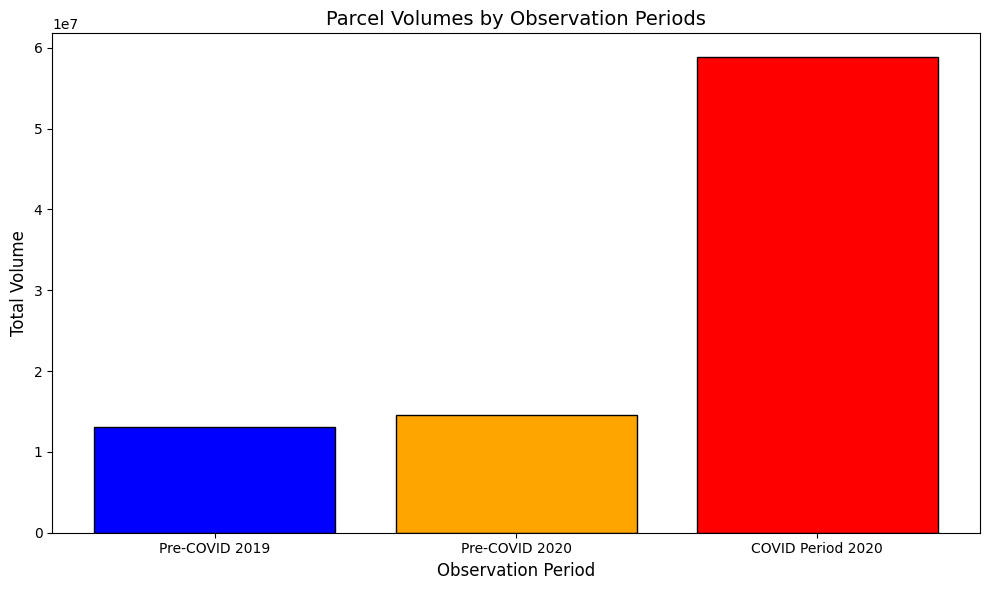

In [14]:
# Step 7: Define Observation Periods and Analyze Trends
# Define Pre-COVID (Week 1-15 of 2019 and 2020) and COVID (Week 16 onwards in 2020) periods.
pre_covid_2019 = parcel_data[(parcel_data['THE_YEAR'] == 2019) & (parcel_data['THE_WEEK'] <= 15)]
pre_covid_2020 = parcel_data[(parcel_data['THE_YEAR'] == 2020) & (parcel_data['THE_WEEK'] <= 15)]
covid_period_2020 = parcel_data[(parcel_data['THE_YEAR'] == 2020) & (parcel_data['THE_WEEK'] >= 16)]

# Summarize parcel volumes for each period.
pre_covid_2019_volume = pre_covid_2019['VOLUME'].sum()
pre_covid_2020_volume = pre_covid_2020['VOLUME'].sum()
covid_period_volume = covid_period_2020['VOLUME'].sum()

# Display results for each period.
print("Pre-COVID 2019 Volume:", pre_covid_2019_volume)
print("Pre-COVID 2020 Volume:", pre_covid_2020_volume)
print("COVID Period 2020 Volume:", covid_period_volume)

# Visualize Comparison of Volumes
volumes = [pre_covid_2019_volume, pre_covid_2020_volume, covid_period_volume]
labels = ['Pre-COVID 2019', 'Pre-COVID 2020', 'COVID Period 2020']

plt.figure(figsize=(10, 6))
plt.bar(labels, volumes, color=['blue', 'orange', 'red'], edgecolor='black')
plt.title('Parcel Volumes by Observation Periods', fontsize=14)
plt.xlabel('Observation Period', fontsize=12)
plt.ylabel('Total Volume', fontsize=12)
plt.tight_layout()

In [16]:
# Step 8: Calculate Customer Growth
# Aggregate parcel volumes for each customer during pre-COVID and COVID periods.
pre_covid_volumes = pre_covid_2020.groupby('FakeCustomerID')['VOLUME'].sum()
covid_volumes = covid_period_2020.groupby('FakeCustomerID')['VOLUME'].sum()

# Merge pre-COVID and COVID volumes to calculate growth.
growth_data = pd.DataFrame({'Pre-COVID Volume': pre_covid_volumes, 'COVID Volume': covid_volumes}).fillna(0)
growth_data['Growth'] = growth_data['COVID Volume'] - growth_data['Pre-COVID Volume']

# Categorize customers based on growth.
def categorize_growth(row):
    if row['Pre-COVID Volume'] == 0 and row['COVID Volume'] > 0:
        return 'New Customer'
    elif row['Growth'] > 0:
        return 'High Growth'
    elif row['Growth'] == 0:
        return 'Stable'
    elif row['Growth'] < 0:
        return 'Declining'
    elif row['Pre-COVID Volume'] > 0 and row['COVID Volume'] == 0:
        return 'Lost Customer'

growth_data['Category'] = growth_data.apply(categorize_growth, axis=1)

# Display the categorized data.
print("Customer Growth Categories:")
print(growth_data['Category'].value_counts())

Customer Growth Categories:
Category
High Growth     951
Declining        88
New Customer      7
Name: count, dtype: int64


Revenue Impact by Customer Category:
              Pre-COVID Revenue  COVID Revenue
Category                                      
Declining             4341106.0   1.919170e+06
High Growth         317277268.0   1.292418e+09
New Customer                0.0   5.099600e+05


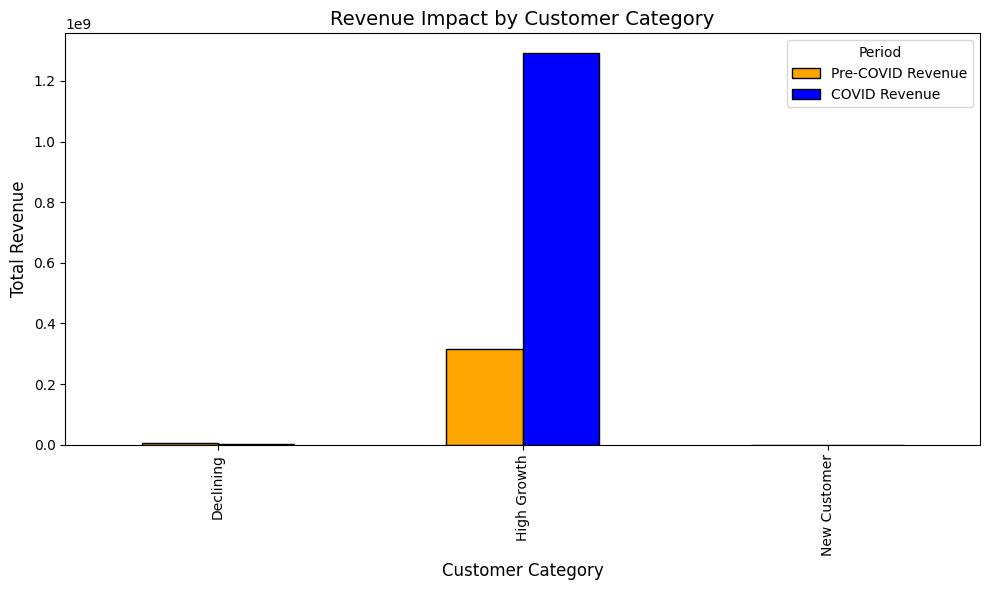

In [17]:
# Step 9: Revenue Impact Analysis by Customer Groups

# Assume base parcel cost and discount for contract customers
base_cost = 22.00  # cost per parcel without a contract

# Calculate revenue for each customer during pre-COVID and COVID periods
growth_data['Pre-COVID Revenue'] = growth_data['Pre-COVID Volume'] * base_cost
growth_data['COVID Revenue'] = growth_data['COVID Volume'] * base_cost

# Aggregate revenue by customer category
revenue_impact = growth_data.groupby('Category')[['Pre-COVID Revenue', 'COVID Revenue']].sum()

# Display revenue impact
print("Revenue Impact by Customer Category:")
print(revenue_impact)

# Visualize revenue contribution by customer categories
revenue_impact.plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'], edgecolor='black')
plt.title('Revenue Impact by Customer Category', fontsize=14)
plt.xlabel('Customer Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Period')
plt.tight_layout()
plt.show()


In [18]:
# Step 10: Summarize Findings and Recommendations

# Summarize growth categories and revenue changes
summary = growth_data.groupby('Category').agg({
    'Pre-COVID Volume': 'sum',
    'COVID Volume': 'sum',
    'Pre-COVID Revenue': 'sum',
    'COVID Revenue': 'sum'
})

# Calculate percentage change in revenue for each category
summary['Revenue Change (%)'] = ((summary['COVID Revenue'] - summary['Pre-COVID Revenue']) / summary['Pre-COVID Revenue']) * 100

# Display the summary table
print("Summary of Findings by Customer Category:")
print(summary)

# Save the summary to a CSV for reporting
summary.to_csv('Customer_Growth_Analysis_Summary.csv', index=True)

# Key Recommendations
recommendations = {
    'New Customers': "Focus on retention strategies for new customers acquired during COVID.",
    'High Growth': "Leverage high-growth customers by offering additional incentives to sustain growth.",
    'Stable': "Monitor stable customers for signs of decline and re-engage with promotions.",
    'Declining': "Identify causes of decline and consider targeted outreach or incentives.",
    'Lost Customer': "Implement a win-back campaign to regain lost customers."
}

# Display recommendations
print("Recommendations by Customer Category:")
for category, recommendation in recommendations.items():
    print(f"{category}: {recommendation}")


Summary of Findings by Customer Category:
              Pre-COVID Volume  COVID Volume  Pre-COVID Revenue  \
Category                                                          
Declining             197323.0       87235.0          4341106.0   
High Growth         14421694.0    58746258.0        317277268.0   
New Customer               0.0       23180.0                0.0   

              COVID Revenue  Revenue Change (%)  
Category                                         
Declining      1.919170e+06          -55.790759  
High Growth    1.292418e+09          307.346446  
New Customer   5.099600e+05                 inf  
Recommendations by Customer Category:
New Customers: Focus on retention strategies for new customers acquired during COVID.
High Growth: Leverage high-growth customers by offering additional incentives to sustain growth.
Stable: Monitor stable customers for signs of decline and re-engage with promotions.
Declining: Identify causes of decline and consider targeted outrea

Visualizations saved successfully for presentation.


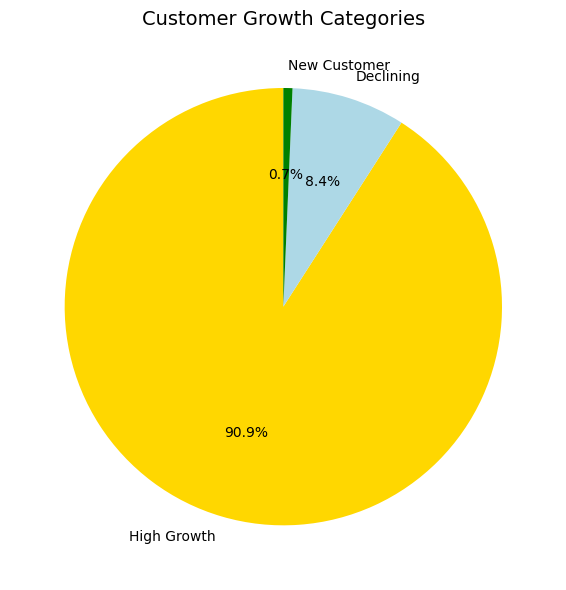

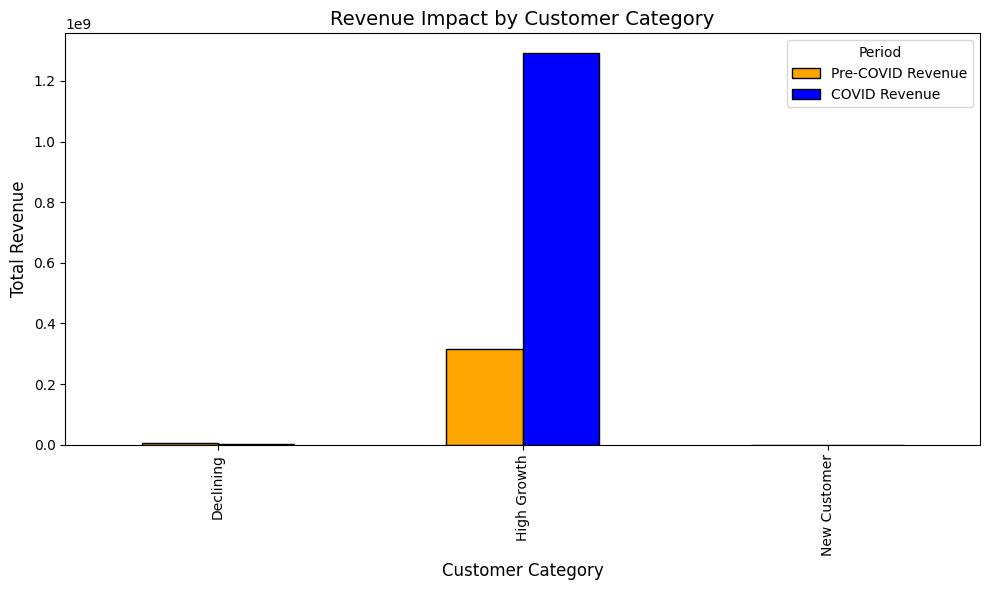

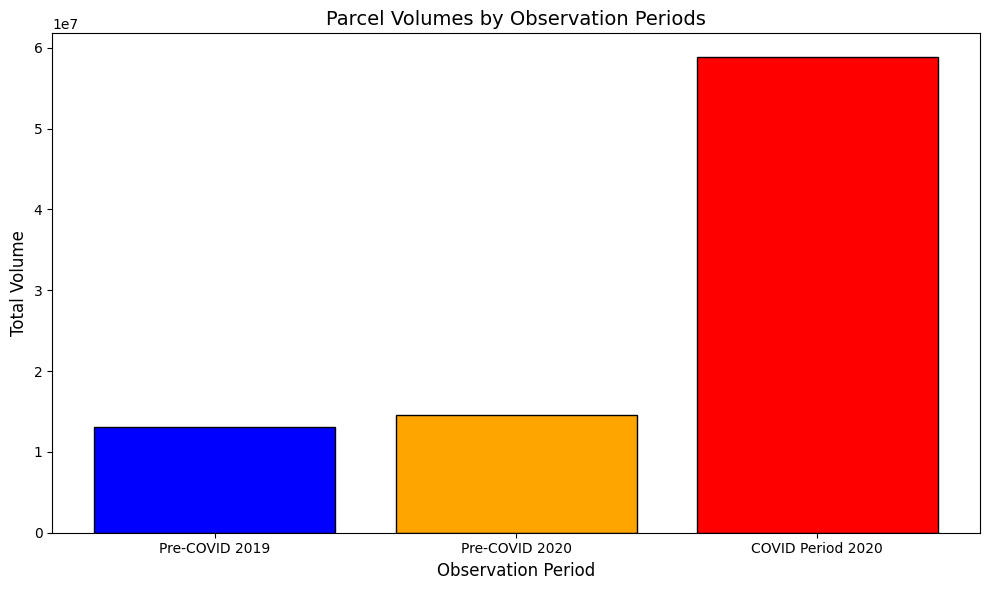

In [20]:
# Define category_counts for visualization
category_counts = growth_data['Category'].value_counts()

# Save pie chart for customer growth categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue', 'green', 'red', 'gray'])
plt.title('Customer Growth Categories', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.savefig('Customer_Growth_Categories_Pie_Chart.png')

# Save revenue impact bar chart
revenue_impact.plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'], edgecolor='black')
plt.title('Revenue Impact by Customer Category', fontsize=14)
plt.xlabel('Customer Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Period')
plt.tight_layout()
plt.savefig('Revenue_Impact_by_Customer_Category.png')

# Save observation period comparison bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, volumes, color=['blue', 'orange', 'red'], edgecolor='black')
plt.title('Parcel Volumes by Observation Periods', fontsize=14)
plt.xlabel('Observation Period', fontsize=12)
plt.ylabel('Total Volume', fontsize=12)
plt.tight_layout()
plt.savefig('Parcel_Volumes_Observation_Periods.png')

print("Visualizations saved successfully for presentation.")


In [21]:
# Step 12: Generate an Executive Summary

# Create a summary DataFrame for key insights
executive_summary = pd.DataFrame({
    'Customer Category': category_counts.index,
    'Count': category_counts.values,
    'Total Pre-COVID Revenue': revenue_impact['Pre-COVID Revenue'],
    'Total COVID Revenue': revenue_impact['COVID Revenue'],
    'Revenue Change (%)': ((revenue_impact['COVID Revenue'] - revenue_impact['Pre-COVID Revenue']) / revenue_impact['Pre-COVID Revenue'] * 100).values
})

# Save the executive summary to a CSV for reference
executive_summary.to_csv('Executive_Summary.csv', index=False)

# Display the summary
print("Executive Summary:")
print(executive_summary)

# Recommendations can be printed as key notes
print("\nKey Recommendations:")
for category, recommendation in recommendations.items():
    print(f"{category}: {recommendation}")


Executive Summary:
             Customer Category  Count  Total Pre-COVID Revenue  \
Category                                                         
Declining          High Growth    951                4341106.0   
High Growth          Declining     88              317277268.0   
New Customer      New Customer      7                      0.0   

              Total COVID Revenue  Revenue Change (%)  
Category                                               
Declining            1.919170e+06          -55.790759  
High Growth          1.292418e+09          307.346446  
New Customer         5.099600e+05                 inf  

Key Recommendations:
New Customers: Focus on retention strategies for new customers acquired during COVID.
High Growth: Leverage high-growth customers by offering additional incentives to sustain growth.
Stable: Monitor stable customers for signs of decline and re-engage with promotions.
Declining: Identify causes of decline and consider targeted outreach or incentiv

In [22]:
# Step 13: Calculate Industry Standard Growth Rate (ISGR)

# Aggregate total volume for Pre-COVID periods in 2019 and 2020
pre_covid_2019_total = pre_covid_2019['VOLUME'].sum()
pre_covid_2020_total = pre_covid_2020['VOLUME'].sum()

# Calculate ISGR
isgr = ((pre_covid_2020_total - pre_covid_2019_total) / pre_covid_2019_total) * 100

# Display ISGR
print(f"Industry Standard Growth Rate (ISGR): {isgr:.2f}%")

# Update Growth Categorization to include ISGR
def categorize_with_isgr(row):
    if row['Pre-COVID Volume'] == 0 and row['COVID Volume'] > 0:
        return 'New Customer'
    elif row['Growth'] > (isgr / 100) * row['Pre-COVID Volume']:
        return 'High Growth'
    elif row['Growth'] == 0:
        return 'Stable'
    elif row['Growth'] < 0:
        return 'Declining'
    elif row['Pre-COVID Volume'] > 0 and row['COVID Volume'] == 0:
        return 'Lost Customer'

# Apply the updated categorization
growth_data['Category'] = growth_data.apply(categorize_with_isgr, axis=1)

# Display updated counts by category
print("Updated Customer Growth Categories (with ISGR):")
print(growth_data['Category'].value_counts())


Industry Standard Growth Rate (ISGR): 11.40%
Updated Customer Growth Categories (with ISGR):
Category
High Growth     941
Declining        88
New Customer      7
Name: count, dtype: int64
